In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from scipy.stats import t
from scipy.stats import norm
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 

In [25]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


In [26]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(0, len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, deg=1)

    return bs_slope_reps, bs_intercept_reps

In [27]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

In [28]:
draft_df = pd.read_csv('career_df_2006.csv')

In [29]:
draft_df.columns

Index(['Year', 'Name', 'College', 'POS', 'Height (in)', 'Weight (lbs)',
       '40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)',
       'Shuttle', '3Cone', 'Win-Loss Record', 'Round', 'Pick', 'Team', 'Age',
       'To', 'AP1', 'PB', 'St', 'CarAV', 'DrAV', 'Solo', 'Int', 'Sacks',
       'Drafted'],
      dtype='object')

In [30]:
draft_df.head()

,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted
0,2006.0,Darrell Adams,Villanova,DE,76.63,277.0,5.08,22.0,27.0,109.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.0,30.5,103.0,...,2009.0,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,D
2,2006.0,Jahmile Addae,West Virginia,FS,70.25,214.0,4.74,NaN,38.5,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,U
3,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.0,32.0,112.0,...,2009.0,0.0,0.0,2.0,13.0,13.0,109.0,NaN,3.0,D
4,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.0,39.5,131.0,...,2012.0,0.0,0.0,1.0,13.0,9.0,213.0,15.0,NaN,D


In [31]:
draft_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             168 non-null    float64
 1   Name             168 non-null    object 
 2   College          168 non-null    object 
 3   POS              168 non-null    object 
 4   Height (in)      168 non-null    float64
 5   Weight (lbs)     168 non-null    float64
 6   40 Yard          132 non-null    float64
 7   Bench Press      115 non-null    float64
 8   Vert Leap (in)   128 non-null    float64
 9   Broad Jump (in)  129 non-null    float64
 10  Shuttle          108 non-null    float64
 11  3Cone            101 non-null    float64
 12  Win-Loss Record  155 non-null    object 
 13  Round            108 non-null    float64
 14  Pick             108 non-null    float64
 15  Team             108 non-null    object 
 16  Age              101 non-null    float64
 17  To              

In [32]:
drafted= draft_df[draft_df['Drafted'] == 'D']
undrafted = draft_df[draft_df['Drafted'] == 'U']


In [36]:
drafted['Solos_Per_Year'] = 0
for i in range(len(drafted)):
    if((drafted.iloc[i, 17] - drafted.iloc[i, 0]) == 0):
        drafted.iloc[i, 27] = round(drafted.iloc[i, 23] / 1)
    else:
        drafted.iloc[i, 27] = round(drafted.iloc[i, 23] / (drafted.iloc[i, 17] - drafted.iloc[i, 0]), 2)
drafted

<ipython-input-36-68e8c46afb54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drafted['Solos_Per_Year'] = 0
C:\Users\vtkurt13\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Year,Name,College,POS,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),...,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks,Drafted,Solos_Per_Year
1,2006.0,Titus Adams,Nebraska,DT,75.38,306.0,5.12,15.0,30.5,103.0,...,0.0,0.0,0.0,0.0,NaN,1.0,NaN,NaN,D,0.33
3,2006.0,Victor Adeyanju,Indiana,DE,76.25,274.0,4.88,22.0,32.0,112.0,...,0.0,0.0,2.0,13.0,13.0,109.0,NaN,3.0,D,36.33
4,2006.0,Jason Allen,Tennessee,FS,72.88,209.0,4.41,17.0,39.5,131.0,...,0.0,0.0,1.0,13.0,9.0,213.0,15.0,NaN,D,35.50
5,2006.0,Jon Alston,Stanford,OLB,72.75,223.0,4.53,30.0,40.0,132.0,...,0.0,0.0,0.0,6.0,0.0,51.0,NaN,NaN,D,17.00
6,2006.0,James Anderson,Virginia Tech,OLB,74.75,229.0,4.62,NaN,41.0,121.0,...,0.0,0.0,4.0,31.0,25.0,421.0,3.0,12.0,D,46.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,2006.0,Mario Williams,North Carolina State,DE,74.40,269.0,4.75,25.0,34.0,111.0,...,1.0,4.0,9.0,76.0,34.0,317.0,NaN,97.5,D,31.70
163,2006.0,Kamerion Wimbley,Florida State,DE,75.88,248.0,4.64,24.0,38.5,129.0,...,0.0,0.0,8.0,44.0,23.0,322.0,2.0,53.5,D,40.25
164,2006.0,Rodrique Wright,Texas,DT,77.13,300.0,5.11,31.0,32.0,110.0,...,0.0,0.0,0.0,4.0,4.0,28.0,NaN,1.5,D,14.00
165,2006.0,Claude Wroten,Louisiana State,DT,74.00,302.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,2.0,2.0,21.0,NaN,1.5,D,21.00


In [38]:
drafted['Solos_Per_Year'].unique()

array([ 0.33, 36.33, 35.5 , 17.  , 46.78, 22.  , 12.  ,  1.  , 76.54,
        1.33, 15.9 , 18.  , 59.5 , 21.38, 23.11, 37.6 , 18.17, 24.75,
       48.  , 23.91, 28.  , 41.  ,  9.43, 60.11, 37.71, 38.  , 13.7 ,
       76.2 , 58.67, 23.75, 19.67, 64.5 , 19.  , 29.25,  6.25, 56.  ,
       17.75, 53.  , 52.67, 75.4 ,  6.  , 42.2 , 44.  , 22.17, 12.71,
       47.71, 63.  , 37.62, 70.25, 39.11,   nan,  3.  , 34.  , 16.  ,
       54.38, 65.75, 11.  ,  7.  ,  3.5 , 16.89, 27.42, 27.3 , 35.  ,
        2.  ,  4.  , 24.23, 23.67,  9.  , 69.12, 16.75,  8.67, 81.67,
        4.5 , 21.  , 43.  , 60.  , 29.2 , 37.5 , 15.33, 23.82, 68.3 ,
       26.  , 20.25, 15.  , 66.8 , 13.5 , 17.5 , 21.5 , 31.7 , 40.25,
       14.  ])

# Exploring Bench Press

In [11]:
draft_df.groupby(by='Drafted')['Bench Press'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,81.0,21.839506,7.265426,7.0,17.0,21.0,25.0,44.0
U,34.0,19.352941,7.803971,7.0,15.0,17.5,22.0,45.0


In [12]:
bench_mean = round(np.mean(draft_df['Bench Press']), 3)
bench_std= round(np.std(draft_df['Bench Press']), 3)
bench_mean, bench_std

(21.104, 7.449)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


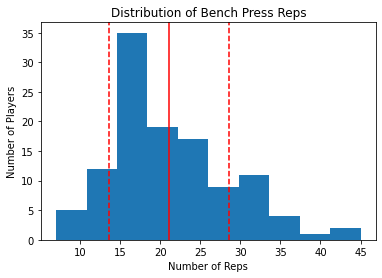

In [13]:
_ = plt.hist(draft_df['Bench Press'])
_ = plt.xlabel('Number of Reps')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Bench Press Reps')
_ = plt.axvline(bench_mean, color='r')
_ = plt.axvline(bench_mean + bench_std, color='r', linestyle='--')
_ = plt.axvline(bench_mean - bench_std, color='r', linestyle='--')

In [14]:
bench_draft = drafted['Bench Press']
bench_udraft = undrafted['Bench Press']


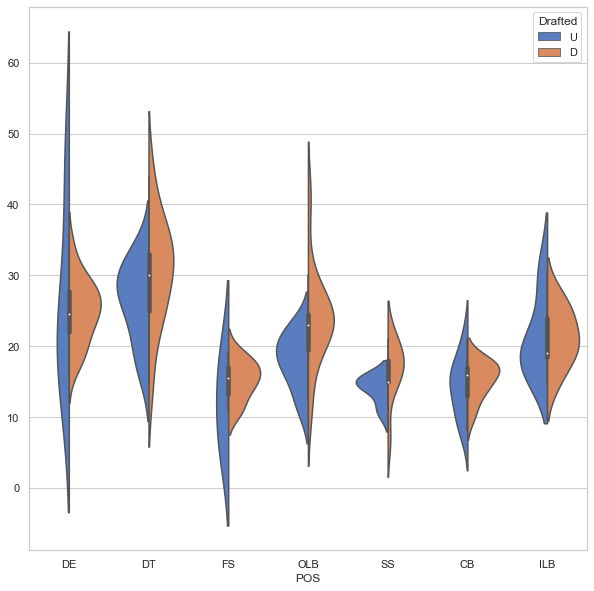

In [15]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="Bench Press", hue="Drafted", split=True)
_ = ax.set(ylabel="")

# Exploring 40 Yard Dash

In [16]:
draft_df.groupby(by='Drafted')['40 Yard'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,94.0,4.711277,0.246556,4.34,4.520,4.65,4.855,5.46
U,38.0,4.847368,0.208387,4.47,4.695,4.81,4.975,5.29


In [17]:
yard40_mean = round(np.mean(draft_df['40 Yard']), 3)
yard40_std = round(np.std(draft_df['40 Yard']), 3)
yard40_mean, yard40_std

(4.75, 0.242)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


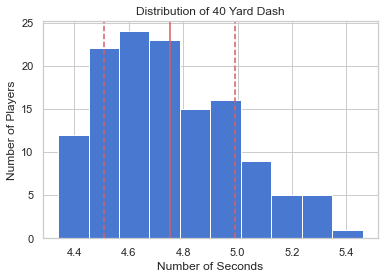

In [18]:
_ = plt.hist(draft_df['40 Yard'])
_ = plt.xlabel('Number of Seconds')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of 40 Yard Dash')
_ = plt.axvline(yard40_mean, color='r')
_ = plt.axvline(yard40_mean + yard40_std, color='r', linestyle='--')
_ = plt.axvline(yard40_mean - yard40_std, color='r', linestyle='--')

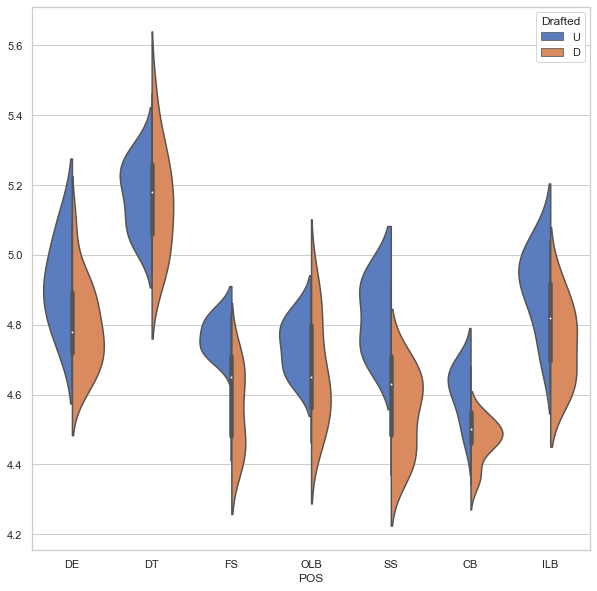

In [19]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="40 Yard", hue="Drafted", split=True)
_ = ax.set(ylabel="")

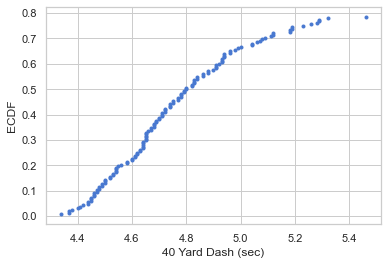

In [20]:
x_yard, y_yard = ecdf(draft_df['40 Yard'])

_ = plt.plot(x_yard, y_yard, marker='.', linestyle='none')

_ = plt.xlabel('40 Yard Dash (sec)')
_ = plt.ylabel('ECDF')

In [21]:
yard_draft = drafted['40 Yard']
yard_udraft = undrafted['40 Yard']
np.mean(yard_draft), np.mean(yard_udraft)

(4.711276595744682, 4.847368421052632)

In [22]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 6]):
        draft_df.iloc[i, 6] = np.mean(drafted['40 Yard'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 6]):
        draft_df.iloc[i, 6] = np.mean(undrafted['40 Yard'])


In [23]:
#draft_df['Permutation40'] = np.random.permutation(draft_df['40 Yard'])

#draft_df.groupby(by='Drafted')['Permutation40'].describe()

In [24]:
diff40 = []

for i in range(10000):
    perm = np.random.permutation(draft_df['40 Yard'])
    mean_diff = np.mean(perm[draft_df['Drafted'] == 'D']) - np.mean(perm[draft_df['Drafted'] == 'U'])
    diff40.append(mean_diff)

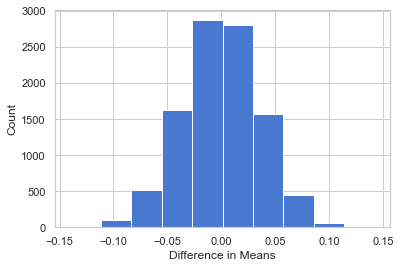

In [25]:
_ = plt.hist(diff40)
_ = plt.xlabel('Difference in Means')
_ = plt.ylabel('Count')

In [26]:
yard40_obs = np.mean(yard_draft) - np.mean(yard_udraft)
yard40_obs = abs(yard40_obs)
print(yard40_obs)

0.1360918253079504


In [27]:
pos_extreme = []
neg_extreme = []

for j in range(len(diff40)):
    if(diff40[j] >= yard40_obs):
        pos_extreme.append(diff40[j])
    elif(diff40[j] <= -yard40_obs):
        neg_extreme.append(diff40[j])
print(len(pos_extreme))
print(len(neg_extreme))

1
1


Lower than 5% reject null hypothesis

# Exploring Vertical Leap

In [28]:
draft_df.groupby(by='Drafted')['Vert Leap (in)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,90.0,36.322222,3.727601,25.0,33.50,37.00,39.375,42.0
U,38.0,34.407895,3.741396,27.0,31.25,34.25,37.000,41.5


In [29]:
vert_leap_mean = round(np.mean(draft_df['Vert Leap (in)']), 3)
vert_leap_std = round(np.std(draft_df['Vert Leap (in)']), 3)
vert_leap_mean, vert_leap_std

(35.754, 3.804)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


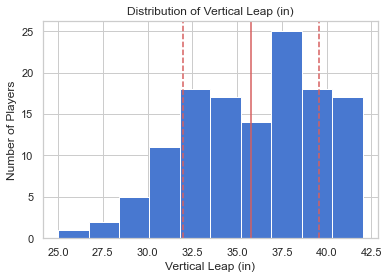

In [30]:
_ = plt.hist(draft_df['Vert Leap (in)'])
_ = plt.xlabel('Vertical Leap (in)')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Vertical Leap (in)')

_ = plt.axvline(vert_leap_mean, color='r')
_ = plt.axvline(vert_leap_mean + vert_leap_std, color='r', linestyle='--')
_ = plt.axvline(vert_leap_mean - vert_leap_std, color='r', linestyle='--')

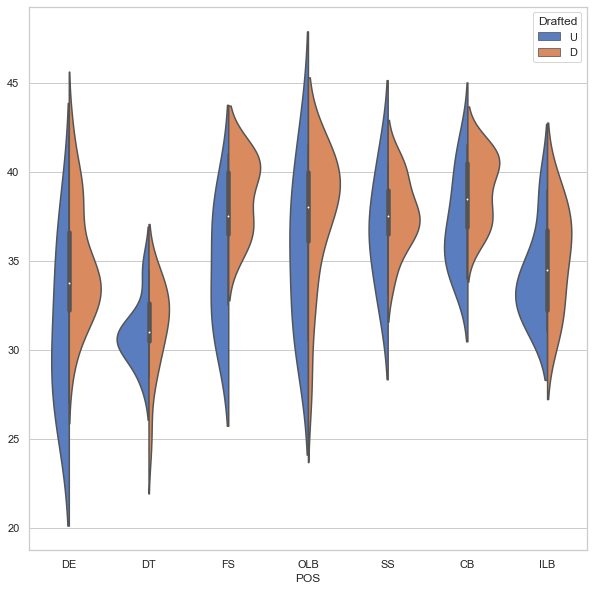

In [31]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y='Vert Leap (in)', hue="Drafted", split=True)
_ = ax.set(ylabel="")

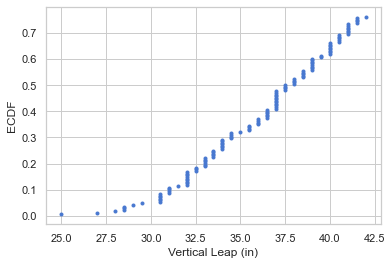

In [32]:
x_vert, y_vert = ecdf(draft_df['Vert Leap (in)'])

_ = plt.plot(x_vert, y_vert, marker='.', linestyle='none')

_ = plt.xlabel('Vertical Leap (in)')
_ = plt.ylabel('ECDF')

In [33]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 8]):
        draft_df.iloc[i, 8] = np.mean(drafted['Vert Leap (in)'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 8]):
        draft_df.iloc[i, 8] = np.mean(undrafted['Vert Leap (in)'])

In [34]:
#draft_df['PermutationVert'] = np.random.permutation(draft_df['Vert Leap (in)'])

#draft_df.groupby(by='Drafted')['PermutationVert'].describe()

In [35]:
diffVert = []

for i in range(10000):
    perm_vert = np.random.permutation(draft_df['Vert Leap (in)'])
    mean_vert_diff = np.mean(perm_vert[draft_df['Drafted'] == 'D']) - np.mean(perm_vert[draft_df['Drafted'] == 'U'])
    diffVert.append(mean_vert_diff)

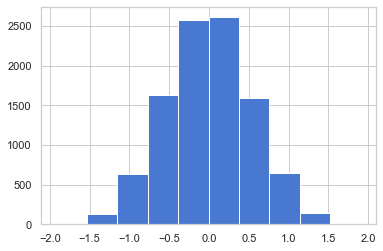

In [36]:
_ = plt.hist(diffVert)

In [37]:
obs_vert_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['Vert Leap (in)'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])['Vert Leap (in)']

obs_vert_diff = abs(obs_vert_diff)

print(obs_vert_diff)

1.914327485380113


In [38]:
pos_extreme_vert = []
neg_extreme_vert = []

for j in range(len(diffVert)):
    if(diffVert[j] >= obs_vert_diff):
        pos_extreme_vert.append(diffVert[j])
    elif(diffVert[j] <= -obs_vert_diff):
        neg_extreme_vert.append(diffVert[j])
print(len(pos_extreme_vert))
print(len(neg_extreme_vert))

0
1


Lower than 5% reject null hypothesis

# Exploring Broad Jump

In [39]:
draft_df.groupby(by='Drafted')['Broad Jump (in)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,91.0,118.714286,8.341710,96.0,113.0,120.0,125.00,133.0
U,38.0,114.263158,6.202372,100.0,109.0,114.5,117.75,127.0


In [40]:
broad_jump_mean = round(np.mean(draft_df['Broad Jump (in)']), 3)
broad_jump_std = round(np.std(draft_df['Broad Jump (in)']), 3)
broad_jump_mean, broad_jump_std

(117.403, 7.981)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


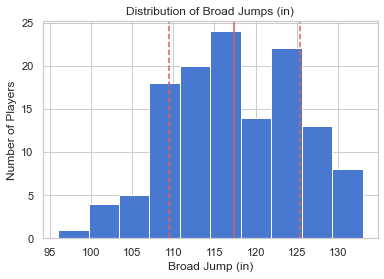

In [41]:
_ = plt.hist(draft_df['Broad Jump (in)'])
_ = plt.xlabel('Broad Jump (in)')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Broad Jumps (in)')
_ = plt.axvline(broad_jump_mean, color='r')
_ = plt.axvline(broad_jump_mean + broad_jump_std, color='r', linestyle='--')
_ = plt.axvline(broad_jump_mean - broad_jump_std, color='r', linestyle='--')

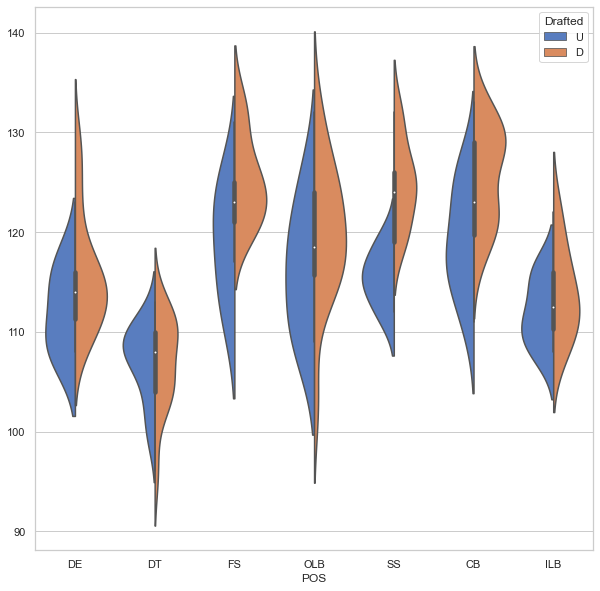

In [42]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="Broad Jump (in)", hue="Drafted", split=True)
_ = ax.set(ylabel="")

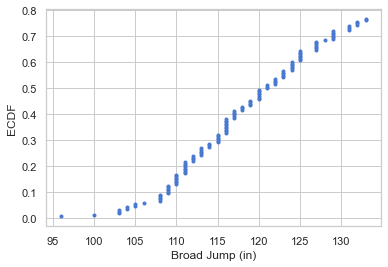

In [43]:
x_broad, y_broad = ecdf(draft_df['Broad Jump (in)'])

_ = plt.plot(x_broad, y_broad, marker='.', linestyle='none')

_ = plt.xlabel('Broad Jump (in)')
_ = plt.ylabel('ECDF')

In [44]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 9]):
        draft_df.iloc[i, 9] = np.mean(drafted['Broad Jump (in)'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 9]):
        draft_df.iloc[i, 9] = np.mean(undrafted['Broad Jump (in)'])

In [45]:
#draft_df['PermutationBroad'] = np.random.permutation(draft_df['Broad Jump (in)'])

#draft_df.groupby(by='Drafted')['PermutationBroad'].describe()

In [46]:
diffBroad = []

for i in range(10000):
    perm_broad = np.random.permutation(draft_df['Broad Jump (in)'])
    mean_broad_diff = np.mean(perm_broad[draft_df['Drafted'] == 'D']) - np.mean(perm_broad[draft_df['Drafted'] == 'U'])
    diffBroad.append(mean_broad_diff)

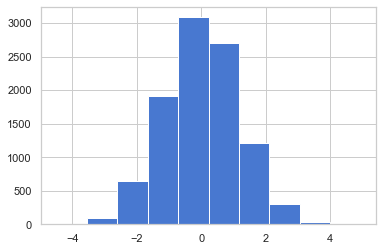

In [47]:
_ = plt.hist(diffBroad)

In [48]:
obs_broad_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['Broad Jump (in)'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])['Broad Jump (in)']

obs_broad_dff = abs(obs_broad_diff)

print(obs_broad_diff)

4.451127819548958


In [49]:
pos_extreme_broad = []
neg_extreme_broad = []

for j in range(len(diffBroad)):
    if(diffBroad[j] >= obs_broad_diff):
        pos_extreme_broad.append(diffBroad[j])
    elif(diffBroad[j] <= -obs_broad_diff):
        neg_extreme_broad.append(diffBroad[j])
print(len(pos_extreme_broad))
print(len(neg_extreme_broad))

1
1


Lower than 5% reject null hypothesis

# Exploring Shuttle Run

In [50]:
draft_df.groupby(by='Drafted')['Shuttle'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,78.0,4.269615,0.185090,3.81,4.1325,4.23,4.3975,4.80
U,30.0,4.353333,0.233819,4.07,4.1725,4.30,4.4425,4.92


In [51]:
shuttle_mean = round(np.mean(draft_df['Shuttle']), 3)
shuttle_std = round(np.std(draft_df['Shuttle']), 3)
shuttle_mean, shuttle_std

(4.293, 0.201)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


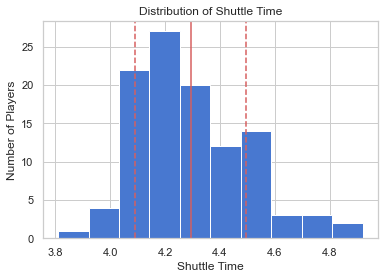

In [52]:
_ = plt.hist(draft_df['Shuttle'])
_ = plt.xlabel('Shuttle Time')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Shuttle Time')
_ = plt.axvline(shuttle_mean, color='r')
_ = plt.axvline(shuttle_mean + shuttle_std, color='r', linestyle='--')
_ = plt.axvline(shuttle_mean - shuttle_std, color='r', linestyle='--')

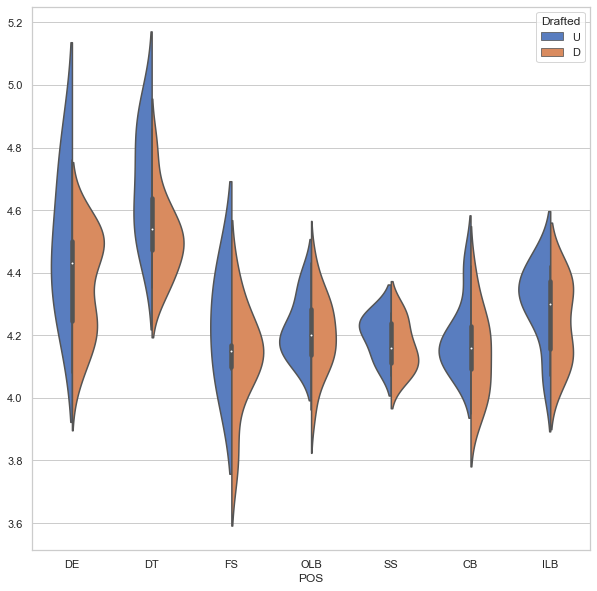

In [53]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="Shuttle", hue="Drafted", split=True)
_ = ax.set(ylabel="")

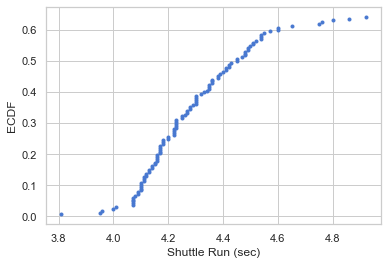

In [54]:
x_shuttle, y_shuttle = ecdf(draft_df['Shuttle'])

_ = plt.plot(x_shuttle, y_shuttle, marker='.', linestyle='none')

_ = plt.xlabel('Shuttle Run (sec)')
_ = plt.ylabel('ECDF')

In [55]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 10]):
        draft_df.iloc[i, 10] = np.mean(drafted['Shuttle'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 10]):
        draft_df.iloc[i, 10] = np.mean(undrafted['Shuttle'])

In [56]:
#draft_df['PermutationShuttle'] = np.random.permutation(draft_df['Shuttle'])

#draft_df.groupby(by='Drafted')['PermutationShuttle'].describe()

In [57]:
diffShuttle = []

for i in range(10000):
    perm_shuttle = np.random.permutation(draft_df['Shuttle'])
    mean_shuttle_diff = np.mean(perm_shuttle[draft_df['Drafted'] == 'D']) - np.mean(perm_shuttle[draft_df['Drafted'] == 'U'])
    diffShuttle.append(mean_shuttle_diff)

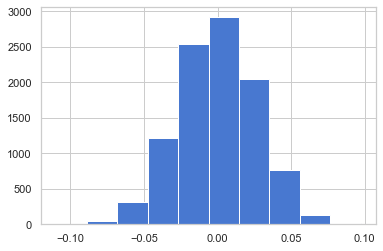

In [58]:
_ = plt.hist(diffShuttle)

In [59]:
obs_shuttle_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['Shuttle'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])["Shuttle"]

obs_shuttle_diff = abs(obs_shuttle_diff)

print(obs_shuttle_diff)

0.08371794871794336


In [60]:
pos_extreme_shuttle = []
neg_extreme_shuttle = []

for j in range(len(diffShuttle)):
    if(diffShuttle[j] >= obs_shuttle_diff):
        pos_extreme_shuttle.append(diffShuttle[j])
    elif(diffShuttle[j] <= -obs_shuttle_diff):
        neg_extreme_shuttle.append(diffShuttle[j])
print(len(pos_extreme_shuttle))
print(len(neg_extreme_shuttle))

5
4


Lower than 5% reject null hypothesis

# Exploring Three Cone Drill

In [61]:
draft_df.groupby(by='Drafted')['3Cone'].describe()

,count,mean,std,min,25%,50%,75%,max
Drafted,,,,,,,,
D,75.0,7.201733,0.375094,6.63,6.9350,7.160,7.4050,8.28
U,26.0,7.308077,0.359522,6.81,7.0225,7.225,7.5875,8.12


In [62]:
cone3_mean = round(np.mean(draft_df['3Cone']), 3)
cone3_std = round(np.std(draft_df['3Cone']), 3)
cone3_mean, cone3_std

(7.229, 0.37)

C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\vtkurt13\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


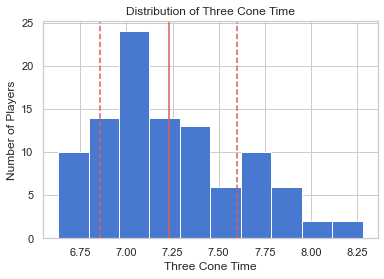

In [63]:
_ = plt.hist(draft_df['3Cone'])
_ = plt.xlabel('Three Cone Time')
_ = plt.ylabel('Number of Players')
_ = plt.title('Distribution of Three Cone Time')
_ = plt.axvline(cone3_mean, color='r')
_ = plt.axvline(cone3_mean + cone3_std, color='r', linestyle='--')
_ = plt.axvline(cone3_mean - cone3_std, color='r', linestyle='--')

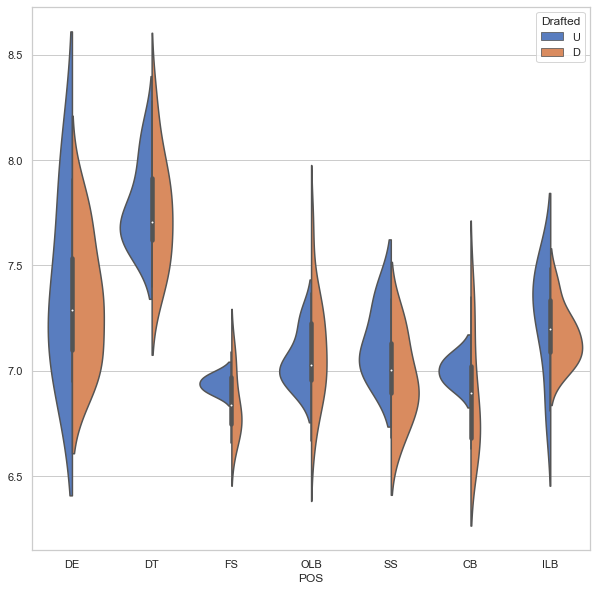

In [64]:
sns.set_theme(style="whitegrid", palette="muted")

# Draw a categorical scatterplot to show each observation
plt.figure(figsize=(10,10))
ax = sns.violinplot(data=draft_df, x="POS", y="3Cone", hue="Drafted", split=True)
_ = ax.set(ylabel="")

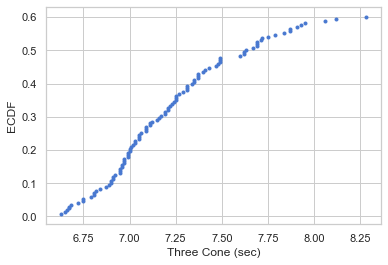

In [65]:
x_cone, y_cone = ecdf(draft_df['3Cone'])

_ = plt.plot(x_cone, y_cone, marker='.', linestyle='none')

_ = plt.xlabel('Three Cone (sec)')
_ = plt.ylabel('ECDF')

In [66]:
for i in range(len(draft_df)):
    if draft_df.iloc[i, 26] == 'D' and np.isnan(draft_df.iloc[i, 11]):
        draft_df.iloc[i, 11] = np.mean(drafted['3Cone'])
    elif draft_df.iloc[i, 26] == 'U' and np.isnan(draft_df.iloc[i, 11]):
        draft_df.iloc[i, 11] = np.mean(undrafted['3Cone'])

In [67]:
#draft_df['PermutationCone'] = np.random.permutation(draft_df['3Cone'])

#draft_df.groupby(by='Drafted')['PermutationCone'].describe()

In [68]:
diffCone = []

for i in range(10000):
    perm_cone = np.random.permutation(draft_df['3Cone'])
    mean_cone_diff = np.mean(perm_cone[draft_df['Drafted'] == 'D']) - np.mean(perm_cone[draft_df['Drafted'] == 'U'])
    diffCone.append(mean_cone_diff)

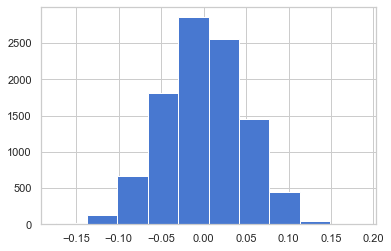

In [69]:
_ = plt.hist(diffCone)

In [70]:
obs_cone_diff = np.mean(draft_df[draft_df['Drafted'] == 'D'])['3Cone'] - np.mean(draft_df[draft_df['Drafted'] == 'U'])['3Cone']

obs_cone_diff = abs(obs_cone_diff)

print(obs_cone_diff)

0.1063435897435907


In [71]:
pos_extreme_cone = []
neg_extreme_cone = []

for j in range(len(diffCone)):
    if(diffCone[j] >= obs_cone_diff):
        pos_extreme_cone.append(diffCone[j])
    elif(diffCone[j] <= -obs_cone_diff):
        neg_extreme_cone.append(diffCone[j])
print(len(pos_extreme_cone))
print(len(neg_extreme_cone))

90
112


Lower than 5% reject the null hypothesis

In [72]:
draft_df.corr()

,Year,Height (in),Weight (lbs),40 Yard,Bench Press,Vert Leap (in),Broad Jump (in),Shuttle,3Cone,Round,...,Age,To,AP1,PB,St,CarAV,DrAV,Solo,Int,Sacks
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height (in),NaN,1.000000,0.642057,0.387461,0.344016,-0.300082,-0.299736,0.322828,0.316469,-0.012376,...,0.133491,-0.012365,-0.001933,-0.073152,0.045188,-0.000314,0.088967,-0.247874,-0.321730,0.220018
Weight (lbs),NaN,0.642057,1.000000,0.707157,0.707069,-0.525628,-0.601679,0.542388,0.569454,0.068643,...,0.058691,-0.024527,0.130115,0.037257,0.070033,0.043118,0.167902,-0.265556,-0.346832,0.163380
40 Yard,NaN,0.387461,0.707157,1.000000,0.476696,-0.729639,-0.812000,0.630407,0.664550,0.195083,...,0.064490,-0.004473,0.116859,-0.017054,0.019414,0.029552,0.156143,-0.232514,-0.378827,0.126430
Bench Press,NaN,0.344016,0.707069,0.476696,1.000000,-0.284253,-0.390276,0.414970,0.424381,-0.043204,...,-0.044985,0.086691,0.228809,0.105332,0.151306,0.170382,0.206227,-0.128864,-0.300647,0.240934
Vert Leap (in),NaN,-0.300082,-0.525628,-0.729639,-0.284253,1.000000,0.796936,-0.571997,-0.604430,-0.145970,...,-0.062961,-0.026344,-0.090094,-0.043430,-0.049624,-0.038362,-0.123163,0.178686,0.104938,-0.107921
Broad Jump (in),NaN,-0.299736,-0.601679,-0.812000,-0.390276,0.796936,1.000000,-0.588959,-0.645854,-0.218306,...,-0.109931,0.045821,-0.046137,0.054706,0.028563,0.018622,-0.112959,0.273976,0.368982,-0.085435
Shuttle,NaN,0.322828,0.542388,0.630407,0.414970,-0.571997,-0.588959,1.000000,0.766283,0.184711,...,0.014855,-0.043095,0.195499,0.147675,0.002699,0.031308,0.057071,-0.208892,-0.116525,0.204624
3Cone,NaN,0.316469,0.569454,0.664550,0.424381,-0.604430,-0.645854,0.766283,1.000000,0.185078,...,0.107778,-0.123277,0.170327,0.109328,-0.037389,-0.021720,0.074372,-0.246701,-0.165982,0.062263
Round,NaN,-0.012376,0.068643,0.195083,-0.043204,-0.145970,-0.218306,0.184711,0.185078,1.000000,...,0.105255,-0.436996,-0.144477,-0.294532,-0.502627,-0.498377,-0.410534,-0.454208,-0.197394,-0.257054


In [73]:
#sns.pairplot(draft_df)

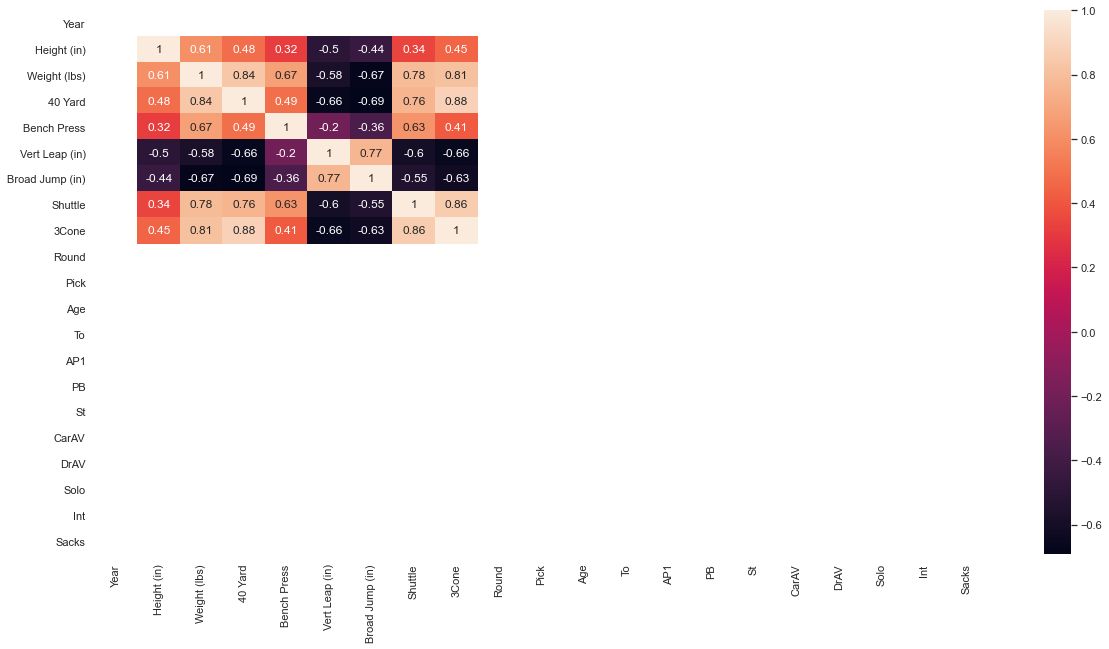

In [74]:
plt.figure(figsize=(20,10))
_ = sns.heatmap(undrafted.corr(), annot=True)

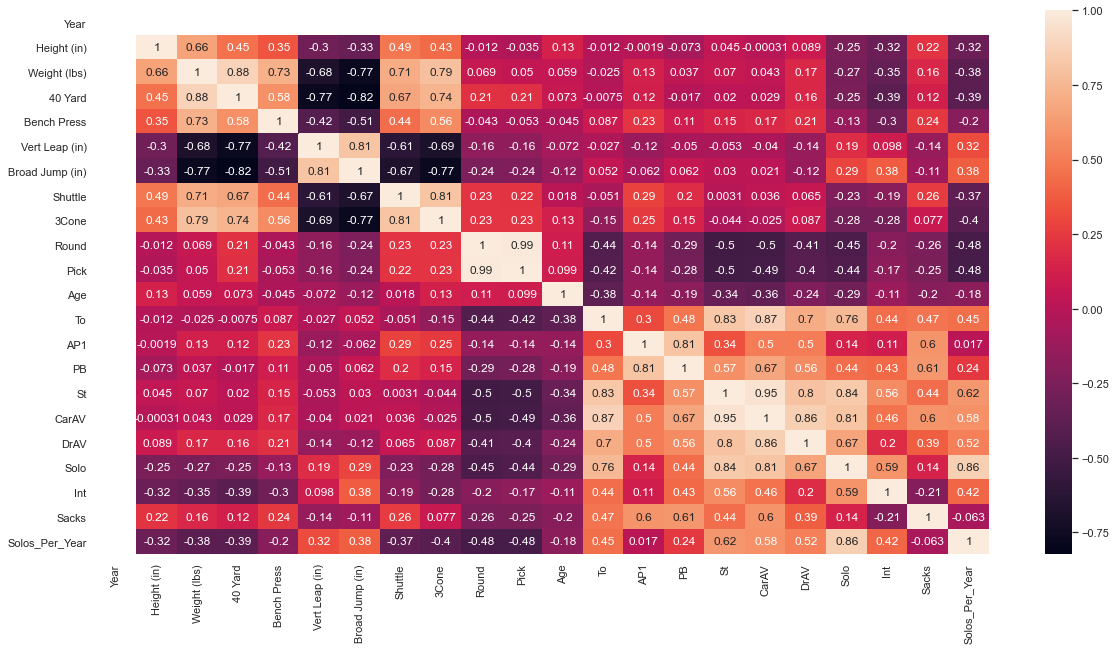

In [75]:
plt.figure(figsize=(20,10))
_ = sns.heatmap(drafted.corr(), annot=True)

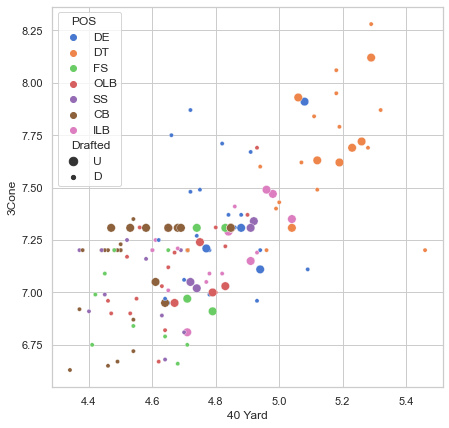

In [76]:
_ = plt.figure(figsize=(7, 7))
_ = sns.scatterplot(x='40 Yard', y='3Cone', data=draft_df, hue='POS', size='Drafted')

In [39]:
drafted['Broad Jump (in)'].replace(np.nan, np.mean(drafted['Broad Jump (in)']), inplace=True)
drafted['Solo'].replace(np.nan, np.mean(drafted['Solo']), inplace=True)
drafted['Solos_Per_Year'].replace(np.nan, np.mean(drafted['Solos_Per_Year']), inplace=True)
drafted['Bench Press'].replace(np.nan, np.mean(drafted['Bench Press']), inplace=True)
drafted['40 Yard'].replace(np.nan, np.mean(drafted['40 Yard']), inplace=True)
drafted['Vert Leap (in)'].replace(np.nan, np.mean(drafted['Vert Leap (in)']), inplace=True)
drafted['Shuttle'].replace(np.nan, np.mean(drafted['Shuttle']), inplace=True)
drafted['3Cone'].replace(np.nan, np.mean(drafted['3Cone']), inplace=True)
drafted['Int'].replace(np.nan, 0, inplace=True)
drafted['Sacks'].replace(np.nan, 0, inplace=True)

C:\Users\vtkurt13\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [41]:
y = drafted[['Solos_Per_Year']]
#X = drafted.drop(columns=['Win-Loss Record', 'Solo', 'Round', 'Pick', 'Year', 'Drafted', 'DrAV', 'CarAV', 'AP1', 'Name', 'College', 'POS', 'To', 'Age', 'Team'])
X = drafted[['Height (in)', 'Weight (lbs)','40 Yard', 'Bench Press', 'Vert Leap (in)', 'Broad Jump (in)', 'Shuttle', '3Cone']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)

In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(81, 8)
(27, 8)
(81, 1)
(27, 1)


In [43]:
rModel = linear_model.LinearRegression(normalize=True)

In [47]:
rModel.coef_

array([[ -1.06734916,  -0.06630591,   1.49954301,   0.28330721,
         -0.28365384,   0.8186173 , -20.79562912,   4.53240909]])

In [46]:
rModel.fit(X_train, y_train)

LinearRegression(normalize=True)

In [48]:
rModel.score(X_train, y_train)

0.20451032336410047

In [49]:
pred = rModel.predict(X_test)

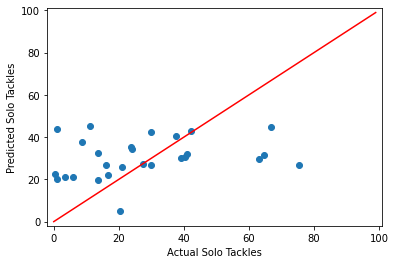

In [54]:
_ = plt.scatter(y_test, pred)
_ = plt.plot([x for x in range(0,100)],[x for x in range(0,100)], color='red')
_ = plt.margins(0.02)
_ = plt.xlabel('Actual Solo Tackles')
_ = plt.ylabel('Predicted Solo Tackles')